In [48]:
class argsclass():
    pass
args = argsclass()

args.experiment_name='AR_LSTM_batch16_samples10_epoch_25_out20_none' 
args.normalizer_type='normal'
args.test_starting_point=15
args.show_plots=True
args.debug=True
args.num_workers = 4
args.batch_size = 16

In [49]:
import sys
sys.path.append('..')
sys.path.append('../..')
import logging
import torch
import matplotlib.pyplot as plt
from utils.arg_extract import get_args
from utils.experiment_evaluator import Evaluator, get_sample_predictions
from utils.experiment import Experiment

plt.ioff()
logging.basicConfig(format='%(message)s', level=logging.INFO)

# args = get_args()

experiment = Experiment(args)
experiment.load_from_disk(test=True)
evaluator = Evaluator(args.test_starting_point, experiment.normalizer,)

Experiment AR_LSTM_batch16_samples10_epoch_25_out20_none
use CPU
Loading datasets


In [50]:
pdir = "/Users/stathis/Code/thesis/wave_propagation/experiments_results/AR_LSTM_batch16_samples10_epoch_25_out20_none/predictions_debug"
model = experiment.model
dataloader = experiment.dataloaders['train']
device = experiment.device
figures_dir = pdir
normalizer = experiment.normalizer
debug = args.debug

batch_images = next(iter(dataloader))

In [53]:
import seaborn as sns
from utils.plotting import imshow
from utils.experiment_evaluator import get_test_predictions_pairs, save_sequence_plots

def show_prediction_plot(title, predicted, target, normalize):
    # -1 means print last frame
    # predicted = predicted[image_to_plot, -1:, :, :].cpu()
    # target = target[image_to_plot, -1:, :, :].cpu()
    fig = plt.figure(figsize=(6, 6))
    sns.set(style="white")  # darkgrid, whitegrid, dark, white, and ticks
    sns.set_context("talk")
    pred = fig.add_subplot(1, 2, 1)
    imshow(predicted, title="Predicted", smoothen=True, obj=pred, normalize=normalize)
    tar = fig.add_subplot(1, 2, 2)
    imshow(target, title="Target", obj=tar, normalize=normalize)
    fig.suptitle(title)
    plt.show()
    plt.close()

torch.Size([1, 5, 128, 128])
torch.Size([1, 70, 128, 128])
torch.Size([1, 70, 128, 128]) torch.Size([1, 70, 128, 128])


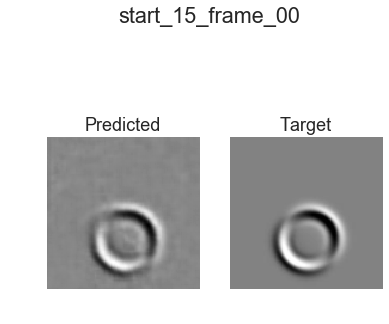

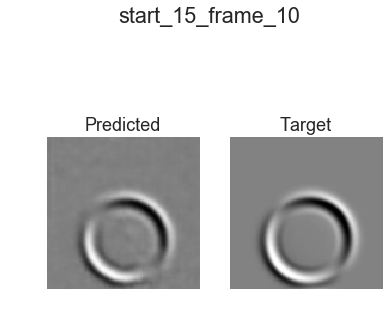

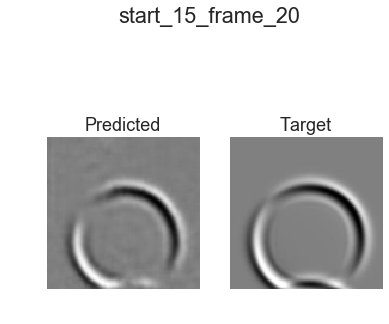

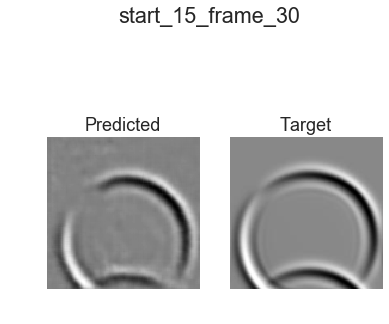

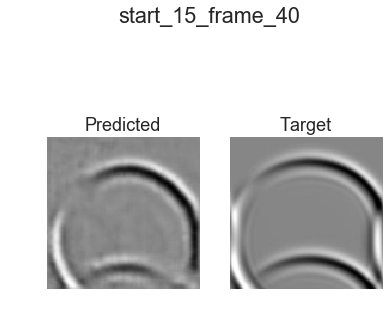

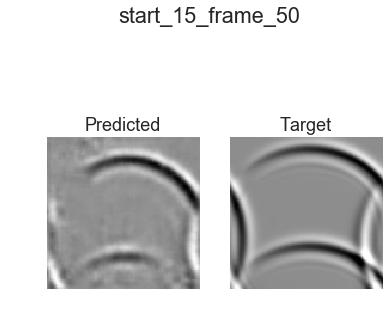

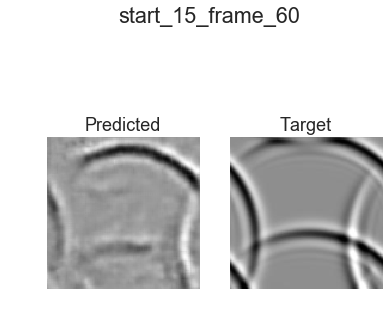

In [54]:
import math

num_input_frames = model.get_num_input_frames()
num_output_frames = model.get_num_output_frames()
num_total_frames = batch_images.size(1)
batch_images = batch_images.to(device)

# for starting_point in range(20, num_total_frames - num_output_frames - num_input_frames, 10):
#     num_total_output_frames = math.floor(math.floor((num_total_frames - num_input_frames - 
#                                                      starting_point)) / 10) * 10  # requests multiple of ten

#     if num_total_output_frames < 10:
#         continue

#     print(starting_point, num_total_output_frames)
starting_point = 15
num_total_output_frames = 70
output_frames, target_frames = get_test_predictions_pairs(model, batch_images, starting_point, num_total_output_frames)
print(output_frames.size(), target_frames.size())

num_real_total_frames = output_frames.size(1)
for frame_index in range(0, num_real_total_frames, 10):
    title = 'start_%02d_frame_%02d' % (starting_point, frame_index)
#         print(title)
    output = output_frames[0, frame_index, :, :].cpu().numpy()
    target = target_frames[0, frame_index, :, :].cpu().numpy()
    show_prediction_plot(title, output, target, normalizer)

In [55]:
batch_images.size()

torch.Size([16, 100, 128, 128])

In [56]:
normalizer

{'mean': 0.0, 'std': 1.0}

In [57]:
from utils.helper_functions import normalize_image

model.eval()           # initialises training stage/functions
model.reset_hidden(1)
with torch.no_grad():
    inp = batch_images[:1, 50:55, :, :]
    out = model(inp, mode='initial_input')
tar = batch_images[:1, 55:56, :, :]

img=out[0,0,:,:].cpu().numpy()
img_n=normalize_image(img, normalizer)
print(img.min(), img.max())
print(img_n.min(), img_n.max())
print(tar.min(), tar.max())

# imshow(img)

# plt.figure()
# imshow(img_n)

# plt.figure()
# imshow(tar)

# plt.show()

-0.027990997 1.0269907
-0.027990997 1.0269907
tensor(0.) tensor(1.)


In [58]:
model.get_num_output_frames()

20

In [63]:
from utils.experiment import load_datasets
print(experiment.files['datasets'])
ds = load_datasets('/Users/stathis/Code/thesis/wave_propagation/experiments_results/AR_LSTM_batch16_samples10_epoch_25_out20_none/pickles/datasets.pickle')
ds['Training data'].transform

Loading datasets


/Users/stathis/Code/thesis/wave_propagation/experiments_results/AR_LSTM_batch16_samples10_epoch_25_out20_none/pickles/datasets.pickle


Compose(
    Resize(size=128, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(128, 128))
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ToTensor()
)

In [64]:
dataloader.dataset.transform

Compose(
    Resize(size=128, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(128, 128))
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.0], std=[1.0])
)

In [76]:
anl = load('/Users/stathis/Code/thesis/wave_propagation/experiments_results/AR_LSTM_batch16_samples10_epoch_25_out20_none/pickles/analyser.pickle')


AttributeError: 'Analyser' object has no attribute 'figures_dir'

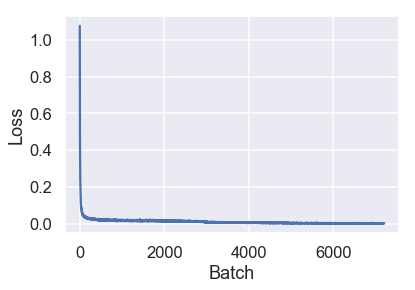

In [77]:
anl.plot_loss_batchwise()

AttributeError: 'Analyser' object has no attribute 'figures_dir'

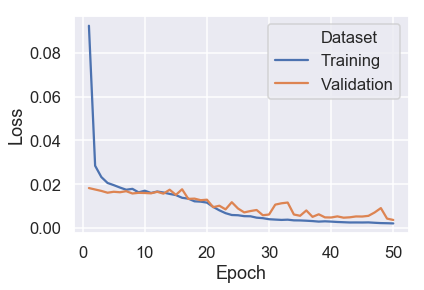

In [78]:
anl.plot_validation_loss()